In [11]:
from PIL import Image
import numpy as np

In [12]:
# 图像的手绘效果变换
# 手绘效果的几个特征：

# 黑白灰色
# 边界线条较重
# 相同或相近色彩趋于白色
# 略有光源效果

# 原理：梯度的重构
# 利用像素之间的梯度值和虚拟深度值对图像进行重构
# 根据灰度变化来模拟人力视觉的明暗程度
# 光源效果：
# 利用灰度变化来模拟人类 视觉的远近效果

# 设计一个位于图像斜上方的虚拟光源
# 光源相对于图像的俯视角为Elevation，方位角是Azimuth
# 建立光源对个点梯度值的影响函数
# 运算出各点的新像素值

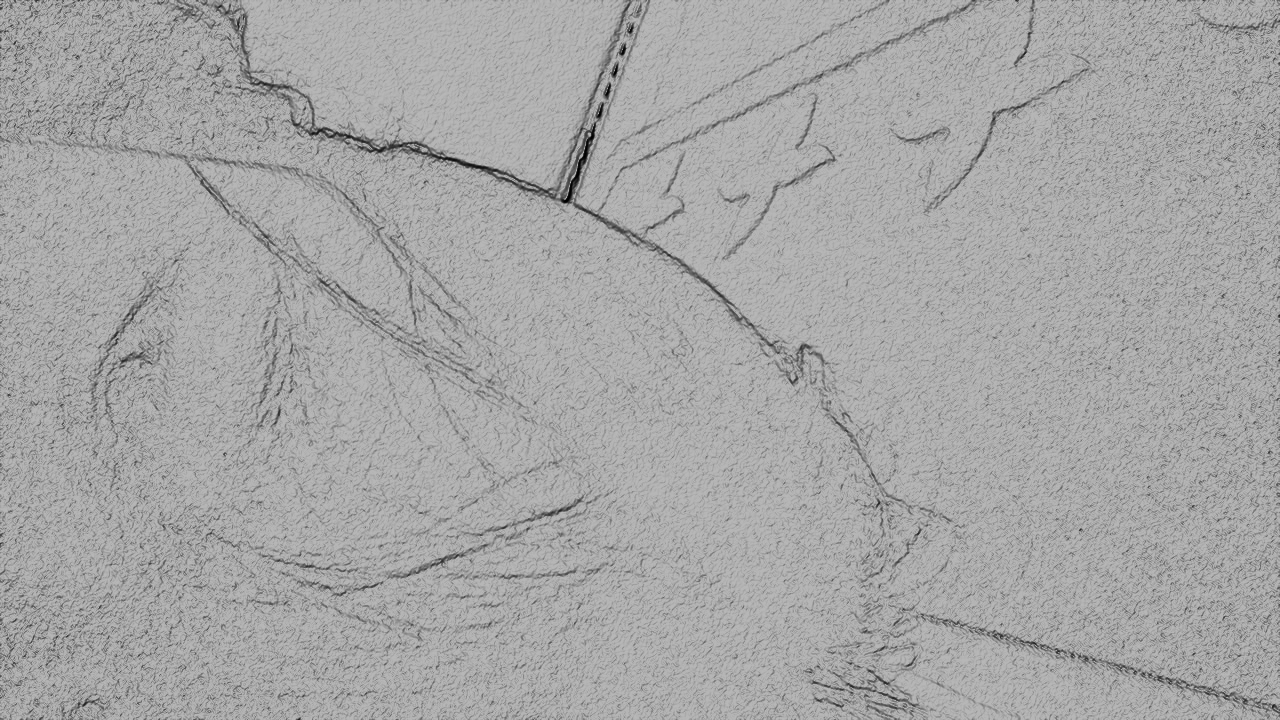

In [19]:
a = np.array(Image.open("2.jpg").convert('L'))
depth = 10   # 预设深度值是10，取值范围为0-100
grad = np.gradient(a)
grad_x,grad_y = grad  # 提取x和y方向的梯度值
grad_x = grad_x*depth/100
grad_y = grad_y*depth/100   # 根据深度调整x和y方向的梯度值，进行归一化处理
vec_el = np.pi/2.2
vec_az = np.pi/4
dx = np.cos(vec_el)*np.cos(vec_az)   # np.cos(vec_el)为单位光线在地平面上的投影长度
dy = np.cos(vec_el)*np.sin(vec_az)
dz = np.sin(vec_az)   # dx,dy,dz是光源对x/y/z三方向的影响程度
A = np.sqrt(grad_x**2+grad_y**2+1.)  # 构造x和y轴梯度的三维归一化单位坐标系
uni_x = grad_x/A
uni_y = grad_y/A
uni_z = 1./A
b = 255*(dx*uni_x+dy*uni_y+dz*uni_z)   # 梯度与光源相互作用，将梯度转化为灰度
b = b.clip(0,255)  #  为避免数据越界，将生成的灰度值裁剪至0-255区间
im = Image.fromarray(b.astype('uint8'))
im

In [8]:
b

array([[180.3122292 , 180.3122292 , 180.3122292 , ..., 180.3122292 ,
        180.3122292 , 180.3122292 ],
       [180.3122292 , 180.3122292 , 180.3122292 , ..., 180.3122292 ,
        180.3122292 , 180.3122292 ],
       [180.3122292 , 180.3122292 , 180.3122292 , ..., 180.3122292 ,
        180.3122292 , 180.3122292 ],
       ...,
       [ 80.74011794,  68.4838147 ,  87.75155056, ..., 112.15224539,
        151.8821213 , 159.58160467],
       [143.0892527 , 173.46245014, 138.24025096, ..., 108.62409825,
        142.821839  , 151.8821213 ],
       [113.53084163, 112.93044123, 145.04222684, ..., 105.14632435,
        126.74613698, 126.38887945]])